# 足球运动员分析
## 背景信息
当前，足球运动是最受欢迎的运动之一（也可以说没有之一）。

## 任务说明
我们的任务，就是在众多的足球运动员中，发现统计一些关于足球运动员的共性，或某些潜在的规律。

## 数据集描述
数据集包含的是2017年所有活跃的足球运动员。
* Name 姓名
* Nationality 国籍
* National_Position 国家队位置
* National_Kit 国家队号码
* Club 所在俱乐部
* Club_Position 所在俱乐部位置
* Club_Kit 俱乐部号码
* Club_Joining 加入俱乐部时间
* Contract_Expiry 合同到期时间
* Rating 评分
* Height 身高
* Weight 体重
* Preffered_Foot 擅长左（右）脚
* Birth_Date 出生日期
* Age 年龄
* Preffered_Position 擅长位置
* Work_Rate 工作效率
* Weak_foot 非惯用脚使用频率
* Skill_Moves 技术等级
* Ball_Control 控球技术
* Dribbling 盘球（带球）能力
* Marking 盯人能力
* Sliding_Tackle 铲球
* Standing_Tackle 逼抢能力
* Aggression 攻击能力
* Reactions 反击
* Attacking_Position 攻击性跑位
* Interceptions 抢断
* Vision 视野
* Composure 镇静
* Crossing 下底传中
* Short_Pass 短传
* Long_Pass 长传
* Acceleration 加速度
* Speed 速度
* Stamina 体力
* Strength 强壮
* Balance 平衡
* Agility 敏捷度
* Jumping 跳跃
* Heading 投球
* Shot_Power 射门力量
* Finishing 射门
* Long_Shots 远射
* Curve 弧线
* Freekick_Accuracy 任意球精准度
* Penalties 点球
* Volleys 凌空能力
* GK_Positioning 门将位置感
* GK_Diving 扑救能力
* GK_Kicking 门将踢球能力
* GK_Handling 扑球脱手几率
* GK_Reflexes 门将反应度

# 程序实现
## 导入相关的库
导入需要的库，同时，进行一些初始化的设置。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

## 加载相关的数据集
* 加载相关的数据集（注意原数据集中是否存在标题），并查看数据的大致情况。
* 可以使用head / tail，也可以使用sample。
* 列没有显式完整，我们需要进行设置。（pd.set_option）

In [2]:
data = pd.read_csv("FullData.csv")
# data.head()
# data.sample()
# 当列数较多时，默认情况下列不会显示完整。我们可以通过set_option方法来进行设置。
pd.set_option("display.max_columns", 100)
data.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


## 数据探索与清洗
### 缺失值处理
* 通过inof查看缺失值信息（以及每列的类型信息）。
* 可以通过isnull, any, dropna，fillna等方法结合使用，对缺失值进行处理。

In [3]:
# data.info()
# data[data["Club_Position"].isnull()]
# 过滤掉缺失值。
data = data[data["Club_Position"].notnull()]
# data["Club_Position"].isnull().any()

### 异常值处理
* 通过describe查看数值信息。
* 可配合箱线图辅助。

In [4]:
# data.describe()
# data[["", ""]].plot(kind="box")

### 重复值处理
* 使用duplicate检查重复值。可配合keep参数进行调整。
* 使用drop_duplicate删除重复值。

In [5]:
# 没有重复值。
# data.duplicated().any()
# 如果存在重复值，则删除重复值。
data.drop_duplicates(inplace=True)

### 将身高与体重处理成数值类型，便于分析。


In [6]:
# t = data.copy()
# 注意：身高与体重是字符串类型，替换掉cm或kg之后，依然还是字符串类型，不会自动变成数值类型。
# t["Height"] = t["Height"].apply(lambda x: x.replace("cm", "")).astype(np.int32)
# t["Weight"] = t["Weight"].apply(lambda x: x.replace("kg", "")).astype(np.int32)
# 也可以使用字符串矢量化运算来解决。
# t["Height"] = t["Height"].str.replace("cm", "").astype(np.int32)
# t["Weight"] = t["Weight"].str.replace("kg", "").astype(np.int32)
data["Height"] = data["Height"].str.replace("cm", "").astype(np.int32)
data["Weight"] = data["Weight"].str.replace("kg", "").astype(np.int32)

### 运动员的身高，体重，评分信息分布。

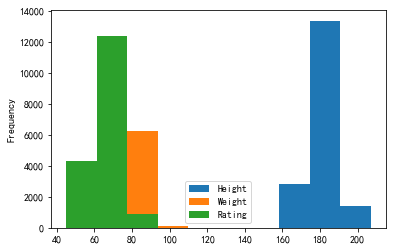

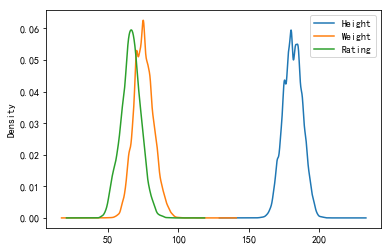

In [7]:
# 直方图是离散的统计，核密度图是连续的统计。身高，体重，与评分服从正态分布。
data[["Height", "Weight", "Rating"]].plot(kind="hist")
data[["Height", "Weight", "Rating"]].plot(kind="kde")

### 左脚与右脚选手在数量上是否存在偏差？

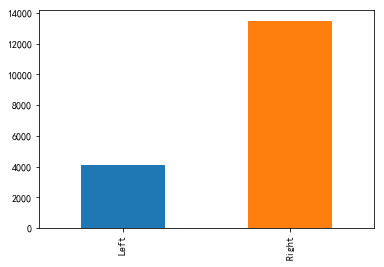

In [8]:
# 解决方法不止一种。
# 1 通过分组，然后聚合统计。
g = data.groupby("Preffered_Foot")
# g["Preffered_Foot"].count().plot(kind="bar")
# 2 通过分组对象的size方法。
# g.size().plot(kind="bar")
# 3 使用value_counts
# value_counts 默认根据值数量，按降序来进行排列。
# 我们可以通过ascending参数来控制升序还是降序。
data["Preffered_Foot"].value_counts(ascending=True).plot(kind="bar")

### 从球员平均评分上考虑，拥有top10评分能力的俱乐部 / 国家。【超过20人】

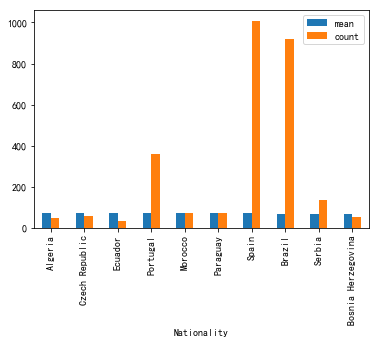

In [9]:
# 对俱乐部统计
# g = data.groupby("Club")
# # g["Rating"].mean().sort_values(ascending=False)
# v = g["Rating"].agg(["mean", "count"])
# v = v[v["count"] > 20]
# v.sort_values("mean", ascending=False).head(10).plot(kind="bar")

# 对国家队统计
g = data.groupby("Nationality")
# g["Rating"].mean().sort_values(ascending=False)
v = g["Rating"].agg(["mean", "count"])
v = v[v["count"] > 20]
v.sort_values("mean", ascending=False).head(10).plot(kind="bar")

### 哪个俱乐部拥有更多忠心的球员（5年及以上）？

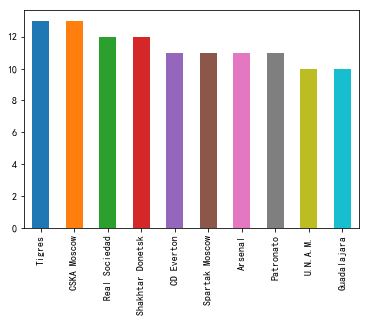

In [12]:
# 获取球员加入俱乐部的年份。
year = data["Club_Joining"].map(lambda x: x.split("/")[-1]).astype(np.int)
# 获取大于等于5年的球员。（同时，去掉自由身的球员）
t = data[(2017 - year >= 5) & (data["Club"] != "Free Agents")]
# t.groupby("Club").size()
# t["Club"].value_counts()
t["Club"].value_counts().head(10).plot(kind="bar")

### 足球运动员是否是出生年月相关？
1. 全体运动员
2. 知名运动员（80分及以上）

In [ ]:
t = data["Birth_Date"].str.split("/", expand=True)
# t[2].value_counts().plot(kind="bar")
# t[0].value_counts().plot(kind="bar")
# t[1].value_counts().plot(kind="bar")

### 足球运动员号码是否与位置相关？

In [ ]:
# 去掉替补球员与预备队球员。
t = data[(data["Club_Position"] != "Sub") & (data["Club_Position"] != "Res")]
t.groupby(["Club_Kit", "Club_Position"]).size().sort_values(ascending=False).head(10).plot(kind="bar")

### 身高与体重是否具有相关性？

In [ ]:
# 身高与体重息息相关。
# data.plot(kind="scatter", x="Height", y="Weight")
# 身高与评分关联性不大。
# data.plot(kind="scatter", x="Height", y="Rating")

### 哪些指标对评分的影响最大？

In [ ]:
data.corr()

### 假设我们不清楚后2列的具体含义是什么，分析该标题可能的含义。

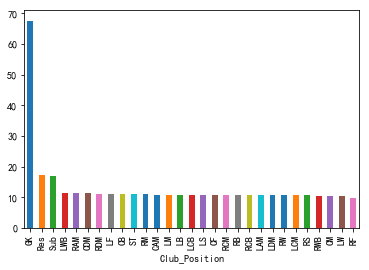

In [84]:
# data.head()
data.groupby("Club_Position")["GK_Handling"].mean().sort_values(ascending=False).plot(kind="bar")

### 年龄与评分具有怎样的关系？

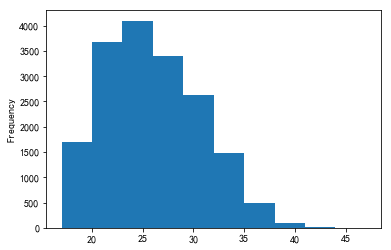

In [86]:
# data.plot(kind="scatter", x="Age", y="Rating")
# data["Age"].plot(kind="hist")

In [92]:
data["Age"].head()

0    32
1    29
2    25
3    30
4    31
Name: Age, dtype: int64

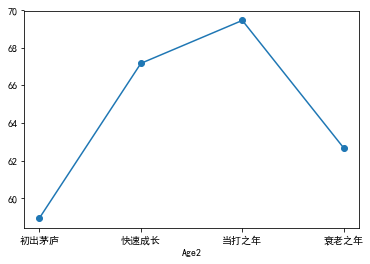

In [99]:
t = data.copy()
# 将连续的值切割成离散的形式。
# 注意：cut切割的桶，区间范围与直方图有些不同。cut的区间是前开后闭的形式。(]
# cut方法返回的值默认为我们桶的区间范围值，我们也可以通过labels属性来显式指定具体的标签。
# pd.cut(data["Age"], bins=5, labels=["1区间", "2区间", "3区间", "4区间", "5区间"]).head(5)
# cut方法，如果bins是整数类型，则区间（桶）进行等分设置，如果区间不等分，则我们可以显式设置区间的取值范围。
# 对bins参数传递一个数组，数组来指定区间的具体值。
t["Age2"] = pd.cut(t["Age"], bins=[1, 20, 30, 40, 100], labels=["初出茅庐", "快速成长", "当打之年", "衰老之年"])
t.groupby("Age2")["Rating"].mean().plot(marker="o", xticks=[0, 1, 2, 3])

## 总结